In [1]:
import glob

# get all the json files in votes_out_2023_07_21
file_names = glob.glob('votes_out_2023_07_21/*.json')
len(file_names)

6798

In [2]:
import pandas as pd
df = pd.DataFrame(file_names, columns=['file_name'])
df.head()

,file_name
0,votes_out_2023_07_21/votes_1143_3000.json
1,votes_out_2023_07_21/votes_1041_2000.json
2,votes_out_2023_07_21/votes_309_4000.json
3,votes_out_2023_07_21/votes_623_4000.json
4,votes_out_2023_07_21/votes_1088_2000.json


In [3]:
# split the file_name column into 3 columns
# split on the slash
df[['path', 'file']] = df['file_name'].str.split('/', expand=True)
df[['_', 'group_id', 'offset']] = df['file'].str.split('_', expand=True)
df.head()

,file_name,path,file,_,group_id,offset
0,votes_out_2023_07_21/votes_1143_3000.json,votes_out_2023_07_21,votes_1143_3000.json,votes,1143,3000.json
1,votes_out_2023_07_21/votes_1041_2000.json,votes_out_2023_07_21,votes_1041_2000.json,votes,1041,2000.json
2,votes_out_2023_07_21/votes_309_4000.json,votes_out_2023_07_21,votes_309_4000.json,votes,309,4000.json
3,votes_out_2023_07_21/votes_623_4000.json,votes_out_2023_07_21,votes_623_4000.json,votes,623,4000.json
4,votes_out_2023_07_21/votes_1088_2000.json,votes_out_2023_07_21,votes_1088_2000.json,votes,1088,2000.json


In [4]:
# how many unique group_ids are there? (should be 1318)
df['group_id'].nunique()

1320

In [5]:
# describe
df.groupby('group_id').offset.count().describe()

count    1320.000000
mean        5.150000
std         0.387739
min         3.000000
25%         5.000000
50%         5.000000
75%         5.000000
max         6.000000
Name: offset, dtype: float64

<Axes: ylabel='Frequency'>

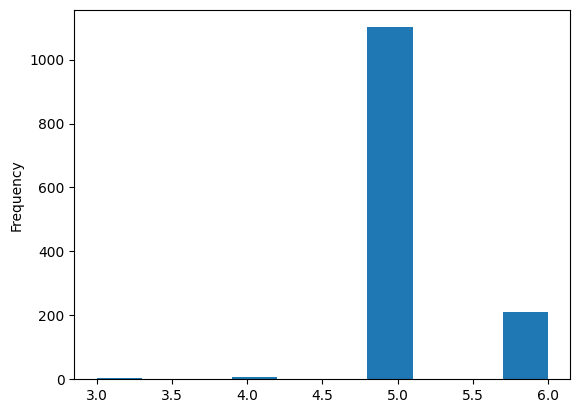

In [6]:
# group by group_id, count offset
df.groupby('group_id').offset.count().plot(kind='hist')

In [7]:
# monkeypatch json
# monkeypatch using standard python json module

import json

pd.io.json._json.loads = lambda s, *a, **kw: json.loads(s)

# monkeypatch using faster simplejson module
import simplejson
pd.io.json._json.loads = lambda s, *a, **kw: simplejson.loads(s)

# normalising (unnesting) at the same time (for nested jsons)
pd.io.json._json.loads = lambda s, *a, **kw: pd.json_normalize(simplejson.loads(s))

In [8]:
len(file_names)

6798

In [9]:
file_names[:10]

['votes_out_2023_07_21/votes_1143_3000.json',
 'votes_out_2023_07_21/votes_1041_2000.json',
 'votes_out_2023_07_21/votes_309_4000.json',
 'votes_out_2023_07_21/votes_623_4000.json',
 'votes_out_2023_07_21/votes_1088_2000.json',
 'votes_out_2023_07_21/votes_415_4000.json',
 'votes_out_2023_07_21/votes_1277_2000.json',
 'votes_out_2023_07_21/votes_1171_1000.json',
 'votes_out_2023_07_21/votes_1178_0.json',
 'votes_out_2023_07_21/votes_1201_1000.json']

In [10]:
file_names_4000 = [f for f in file_names if f.endswith('_4000.json')]
len(file_names_4000)

1314

In [11]:
file_names_3000 = [f for f in file_names if f.endswith('_3000.json')]
len(file_names_3000)

1316

In [12]:
# TODO: count the number of results per file, look for ones with 0 results
# plot the distribution

# read all of the files into a dataframe with a column for the filename
all_files = pd.DataFrame()
dfs = []
for file_name in file_names_3000:
    df = pd.read_json(file_name)
    df['file_name'] = file_name
    dfs.append(df)

all_files = pd.concat(dfs)

/opt/homebrew/lib/python3.11/site-packages/pandas/core/dtypes/astype.py:189: RuntimeWarning: invalid value encountered in cast
  return values.astype(dtype, copy=copy)
/opt/homebrew/lib/python3.11/site-packages/pandas/core/dtypes/astype.py:189: RuntimeWarning: invalid value encountered in cast
  return values.astype(dtype, copy=copy)
/opt/homebrew/lib/python3.11/site-packages/pandas/core/dtypes/astype.py:189: RuntimeWarning: invalid value encountered in cast
  return values.astype(dtype, copy=copy)
/opt/homebrew/lib/python3.11/site-packages/pandas/core/dtypes/astype.py:189: RuntimeWarning: invalid value encountered in cast
  return values.astype(dtype, copy=copy)
/opt/homebrew/lib/python3.11/site-packages/pandas/core/dtypes/astype.py:189: RuntimeWarning: invalid value encountered in cast
  return values.astype(dtype, copy=copy)
/opt/homebrew/lib/python3.11/site-packages/pandas/core/dtypes/astype.py:189: RuntimeWarning: invalid value encountered in cast
  return values.astype(dtype, cop

<Axes: >

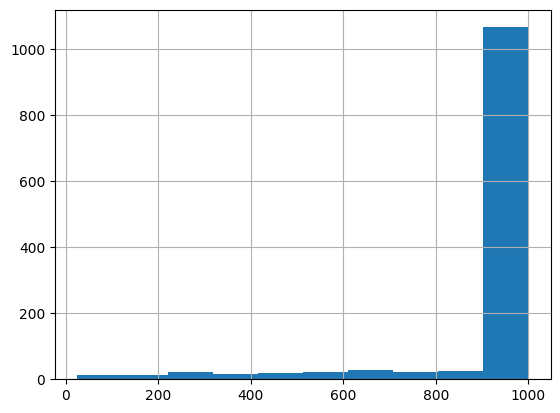

In [13]:
all_files.groupby('file_name').count().id.hist()

In [14]:
# read all of the files into a dataframe with a column for the filename
all_files = pd.DataFrame()
dfs = []
for file_name in file_names_4000:
    df = pd.read_json(file_name)
    df['file_name'] = file_name
    dfs.append(df)

all_files = pd.concat(dfs)

/opt/homebrew/lib/python3.11/site-packages/pandas/core/dtypes/astype.py:189: RuntimeWarning: invalid value encountered in cast
  return values.astype(dtype, copy=copy)
/opt/homebrew/lib/python3.11/site-packages/pandas/core/dtypes/astype.py:189: RuntimeWarning: invalid value encountered in cast
  return values.astype(dtype, copy=copy)
/opt/homebrew/lib/python3.11/site-packages/pandas/core/dtypes/astype.py:189: RuntimeWarning: invalid value encountered in cast
  return values.astype(dtype, copy=copy)
/opt/homebrew/lib/python3.11/site-packages/pandas/core/dtypes/astype.py:189: RuntimeWarning: invalid value encountered in cast
  return values.astype(dtype, copy=copy)
/opt/homebrew/lib/python3.11/site-packages/pandas/core/dtypes/astype.py:189: RuntimeWarning: invalid value encountered in cast
  return values.astype(dtype, copy=copy)
/opt/homebrew/lib/python3.11/site-packages/pandas/core/dtypes/astype.py:189: RuntimeWarning: invalid value encountered in cast
  return values.astype(dtype, cop

<Axes: >

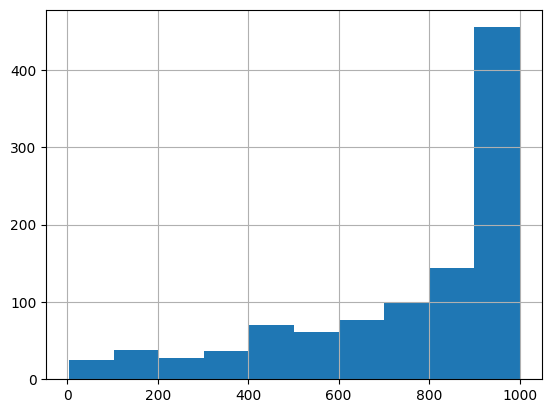

In [15]:
all_files.groupby('file_name').count().id.hist()